<a href="https://colab.research.google.com/github/spalominor/UWorks/blob/main/IAD_OptMultiobjetivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **OPTIMIZACION INDEPENDIENTE EN UN PROBLEMA MULTIOBJETIVO**

Introducción al Análisis de Decisiones
Samuel Palomino Restrepo, m = 5, n = 9

In [11]:
# Se instalan las librerías necesarias
!pip install pulp

Importar las dependencias y librerías

In [12]:
import numpy as np
import pandas as pd
import pulp
import matplotlib.pyplot as plt
import seaborn as sns

# Problema

Una empresa busca un programa de distribución adecuado para su producción, teniendo en cuenta que dispone de tres centros de producción u orígenes situados en diferentes puntos del territorio nacional. Dichos centros los identificaremos mediante las claves O1, O2 y O3. A su vez la empresa tiene dividido el mercado nacional en 4 zonas diferenciadas cuyas ciudades más importantes constituyen los centros de demanda o destinos D1, D2, D3 y D4. La capacidad, en unidades de producto, de los distintos centros de producción, así como la demanda de los diversos destinos aparecen en la tabla.

El empresario considera que los objetivos que deben perseguirse están relacionados con los costos totales del programa de transporte y por el riesgo que corre ante posibles robos de la mercancía. La siguiente tabla recoge la valoración que se hace del costo de transportar una unidad de producto por cada ruta, en unidades monetarias (u.m.). Y la última, muestra el número promedio de robos cometidos por esa vía por mes en los últimos años.

Como puede observarse, no existe relación directa entre los criterios utilizados. Ello es lógico si se piensa que diversos factores, tales como el medio de transporte utilizado, las autopistas, las distancias, etc., actúan sobre cada uno de los objetivos en forma diferente. Formule el problema como un problema de transporte con dos objetivos.

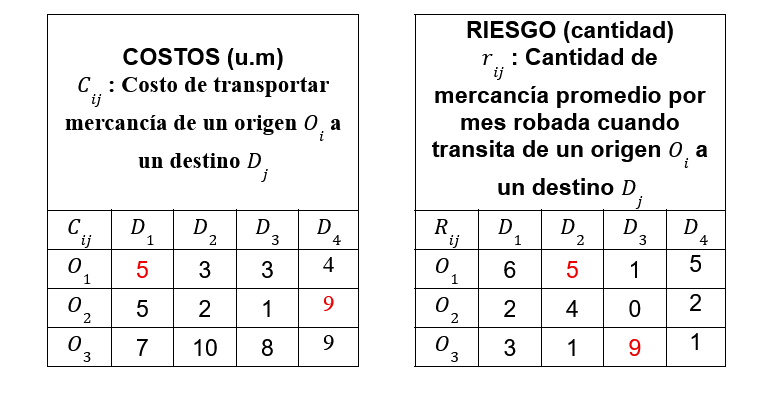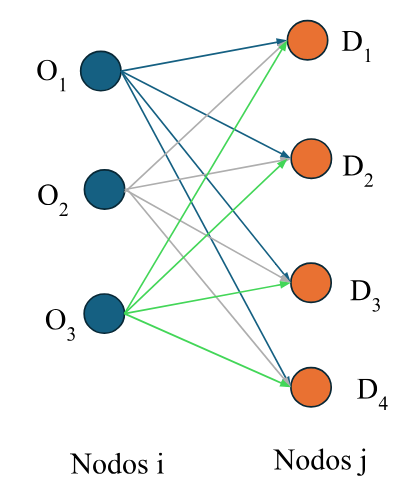

# Solución del problema

Empezamos definiendo las matrices para almacenar los datos del enunciado

In [13]:
# Datos del problema
oferta_maxima_origenes  = [80, 1200, 1500]
demanda_minima_destinos = [500, 700,  900, 1400]

costos_unitarios = [[5, 3, 3, 4],
                    [5, 2, 1, 9],
                    [7, 10, 8, 9]]

riesgo           = [[6, 6, 1, 5],
                    [2, 4, 0, 2],
                    [3, 1, 9, 1]]

nombre_columnas  = ['D1', 'D2', 'D3', 'D4']
nombre_filas     = ['O1', 'O2', 'O3']

Definimos las variables de decisión

$X_{ij}$ = unidades de producto despachadas desde el nodo i al nodo j

In [14]:
# Variables De Decisión
var = [[pulp.LpVariable(f"x_{i}_{j}",
                        lowBound=0, cat='Integer') for j in range(
                            len(nombre_columnas))] for i in range(
                                len(nombre_filas))]

# Solución para minimizar los costos

Definimos la función objetivo y las restricciones

$Z_{1} = min(\sum_i \sum_j C_{ij} X_{ij} )$

Restricciones:
1. $\sum_j x(i,j) \leq O(i) $ , para todo i
2. $\sum_i x(i,j) \geq D(j) $ , para todo j
3. $X_ij \geq 0$

In [15]:
# Definicion del Problema
prob = pulp.LpProblem(f"Minimizacion_de_costos", pulp.LpMinimize)

# Definir la función objetivo de Costos
prob += pulp.lpSum(var[i][j] * costos_unitarios[i][j] for i in range(
    len(nombre_filas)) for j in range(len(nombre_columnas)))

# Definir restricciones de oferta
for i in range(len(nombre_filas)):
    prob += pulp.lpSum(var[i][j] for j in range(
        len(nombre_columnas))) <= oferta_maxima_origenes[i]

# Definir restricciones de demanda
for j in range(len(nombre_columnas)):
    prob += pulp.lpSum(var[i][j] for i in range(
        len(nombre_filas))) >= demanda_minima_destinos[j]

# Resolver el problema
prob.solve()

# Resultados
estado = pulp.LpStatus[prob.status]
valor_objetivo = pulp.value(prob.objective)

Imprimimos los resultados

In [16]:
# Mostrar estado del problema
print(f"Estado del modelo: {estado}")
print(f"Valor mínimo de costos: {valor_objetivo:.2f}\n")

# Crear matriz 2D con los valores resueltos de las variables
costo_matrix = [[v.varValue for v in row] for row in var]

# Definir etiquetas de filas y columnas
filas = [f"Origen {i+1}" for i in range(len(costo_matrix))]
columnas = [f"Destino {j+1}" for j in range(len(costo_matrix[0]))]

# Crear DataFrame para visualización en formato de tabla
df_resultados = pd.DataFrame(costo_matrix, index=filas, columns=columnas)

# Imprimir tabla con formato
print("Distribución óptima de cajas (en unidades):\n")
print(df_resultados.to_string(float_format=lambda x: f"{x:,.2f}"))

Estado del modelo: Infeasible
Valor mínimo de costos: 18800.00

Distribución óptima de cajas (en unidades):

          Destino 1  Destino 2  Destino 3  Destino 4
Origen 1       0.00       0.00       0.00      80.00
Origen 2    -400.00     700.00     900.00       0.00
Origen 3     900.00       0.00       0.00   1,320.00


# Solución para minimizar el índice de riesgo

Definimos la función objetivo y las restricciones

$Z_{2} = min(\sum_i \sum_j R_{ij} X_{ij} )$

Restricciones:
1. $\sum_j x(i,j) \leq O(i) $ , para todo i
2. $\sum_i x(i,j) \geq D(j) $ , para todo j
3. $X_ij \geq 0$

In [17]:
# Definicion del Problema
prob = pulp.LpProblem(f"Minimizacion_de_riesgos", pulp.LpMinimize)

# Definir la función objetivo de Riesgos
prob += pulp.lpSum(var[i][j] * riesgo[i][j] for i in range(
    len(nombre_filas)) for j in range(len(nombre_columnas)))

# Definir restricciones de oferta
for i in range(len(nombre_filas)):
    prob += pulp.lpSum(var[i][j] for j in range(
        len(nombre_columnas))) <= oferta_maxima_origenes[i]

# Definir restricciones de demanda
for j in range(len(nombre_columnas)):
    prob += pulp.lpSum(var[i][j] for i in range(
        len(nombre_filas))) >= demanda_minima_destinos[j]

# Resolver el problema
prob.solve()

# Resultados
estado = pulp.LpStatus[prob.status]
valor_objetivo = pulp.value(prob.objective)

Imprimimos los resultados

In [18]:
# Mostrar estado del problema
print(f"Estado del modelo: {estado}")
print(f"Valor mínimo del riesgo: {valor_objetivo:.2f}\n")

# Crear matriz 2D con los valores resueltos de las variables
riesgo_matrix = [[v.varValue for v in row] for row in var]

# Definir etiquetas de filas y columnas
filas = [f"Origen {i+1}" for i in range(len(riesgo_matrix))]
columnas = [f"Destino {j+1}" for j in range(len(riesgo_matrix[0]))]

# Crear DataFrame para visualización en formato de tabla
df_resultados = pd.DataFrame(riesgo_matrix, index=filas, columns=columnas)

# Imprimir tabla con formato
print("Distribución óptima de cajas (en unidades):\n")
print(df_resultados.to_string(float_format=lambda x: f"{x:,.2f}"))

Estado del modelo: Infeasible
Valor mínimo del riesgo: 4500.00

Distribución óptima de cajas (en unidades):

          Destino 1  Destino 2  Destino 3  Destino 4
Origen 1       0.00       0.00     800.00       0.00
Origen 2     500.00       0.00     100.00     600.00
Origen 3       0.00     700.00       0.00     800.00


# Comparación de resultados

Graficamos la matriz correspondiente a la solución de minimizar cada objetivo para comparar con un mapa de calor, el valor de cada variable

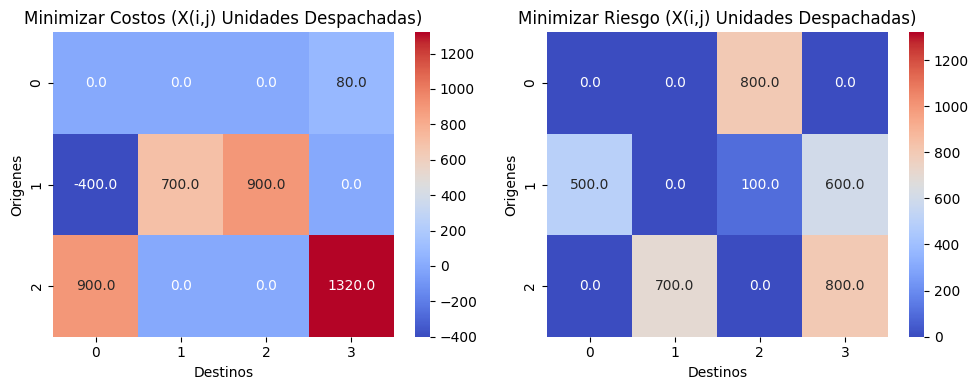

In [21]:
max_escala = max(np.max(costo_matrix), np.max(riesgo_matrix))

# Crear la figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(costo_matrix, annot=True, cmap='coolwarm', ax=axes[0], fmt=".1f",
            vmax=max_escala)
axes[0].set_title("Minimizar Costos (X(i,j) Unidades Despachadas)")
axes[0].set_xlabel("Destinos")
axes[0].set_ylabel("Origenes")

sns.heatmap(riesgo_matrix, annot=True, cmap='coolwarm', ax=axes[1],fmt=".1f",
            vmax=max_escala)
axes[1].set_title("Minimizar Riesgo (X(i,j) Unidades Despachadas)")
axes[1].set_xlabel("Destinos")
axes[1].set_ylabel("Origenes")

# Ajustar espacio
plt.tight_layout()

# Mostrar la gráfica
plt.show()